# Computer Vision SS 2022

*   List item
*   List item


## Exercise Sheet 1: Imaging
### Erhardt Barth / Philipp Gruening / Christoph Linse / Manuel Laufer
Universität zu Lübeck, Institut für Neuro- und Bioinformatik

In case of questions, contact us via email: *{barth, gruening, linse, laufer} @inb.uni-luebeck.de*

## Note: Please insert the names of all participating students:

1. Christian Grundman
2. 
3. 
4. 
5. 


In [1]:
import sys, os
if 'google.colab' in sys.modules:
  if os.getcwd() == '/content':
    !git clone 'https://github.com/inb-luebeck/cs4250.git'
    os.chdir('cs4250')

Cloning into 'cs4250'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 71 (delta 23), reused 58 (delta 14), pack-reused 0
Unpacking objects: 100% (71/71), done.


In [2]:
import cv2 # open cv
import matplotlib.pyplot as plt # plotting tools
import numpy as np # matrix, array operations

from os.path import join # combine different items to a path
from os import getcwd, listdir # shows the current directory, lists items in a directory

# show plots when running cell
%matplotlib inline 

## Exercise 1.1
### Loading and displaying images in Python
Download the image `clown.png` from the website of the tutorial. Load
the image in Python via opencv (`cv2.imread`). By default the image is loaded as BGR (blue, green, red), convert the image to gray with `cv2.cvtColor`.
Display the image `plt.imshow`, use the colormap `gray`.

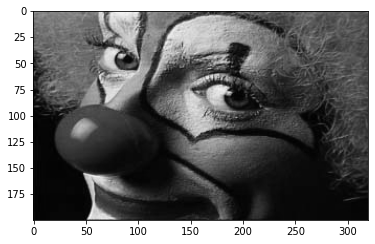

In [19]:
# TODO: define image path
clown_path = "/content/cs4250/data/exercise_1/clown.png"

# TODO: read image
img = cv2.imread(clown_path)

# TODO: convert image to grayscale
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# TODO: display image
plt.imshow(img)


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exercise 1.2
### Image gradients
Images are stored as `numpy arrays`, for further computations convert the array to range $[0, 1]$ (`astype`). Define a function `load_gray_normalized` that loads the image, converts it to grayscale and normalizes it.
Compute the image gradients $d_x$ and $d_y$ for the image from the previous assignment. Initialize a simple gradient kernel like $[-1, 0, +1]$ for $d_x$ (`np.zeros`, `np.array`) and filter the image with it (`cv2.filter2D`). Visualize the results using `plt.imshow`. To this end, display the resulting images of both derivatives along `x` and `y` in a single figure (`plt.subplots`).

What do you need to take care of, to be able to visually **compare** the results?
Hint: the problem is related to the range of the pixel values in the two 
gradient images. Name the problem and propose a solution to it by using the options of the `plt.imshow`
function. 

In [121]:
def load_gray_normalized(image_path):

    # Load image
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Convert to Gray
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Normalize image
    result = cv2.normalize(gray_img, None, alpha=0, beta=1, 
                           norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_16S)
    return result


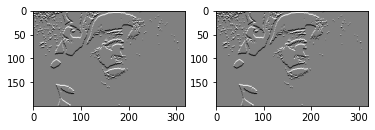

In [122]:
# TODO: load image
img = load_gray_normalized("/content/cs4250/data/exercise_1/clown.png")

# TODO: define kernels
d_x = np.array([-1, 0, 1])
d_y = np.transpose(d_x)

# TODO: filter images
img_filtered_x = cv2.filter2D(img, -1, d_x)
img_filtered_y = cv2.filter2D(img, -1, d_y)

# TODO: display images
plt.figure()
plt.subplot(121)
plt.imshow(img_filtered_x, 'gray')
plt.subplot(122)
plt.imshow(img_filtered_y, 'gray')


## Exercise 1.3
### Point operations
Download from the website the images `ueb131.png` and `ueb132.png`, 
then load and display them.  
Both images illustrate two commonly encountered problems in photography. 
Underexposed (overexposed) images are darker (brighter) than they should be, 
because they have been exposed to too little (too much) light. 

Compute and display the histograms (`plt.hist`,`np.flatten`) of the images in range $[0,1]$. Write a function `display_with_hist` that creates two subplots, showing the image and the respective histogram.

Can you identify the exposure problems in the histograms?
Hint: look at how the pixel intensities are distributed. 

These defects can be corrected by remapping the pixel values to achieve a 
more evenly distributed range of pixel intensities. 
This can either be done by using histogram equalization (`cv2.equalizeHist`) or by using the logarithmic and power functions.

To use `cv2.equalizeHist`, the images need to be casted to uint8 in $[0,255]$. Write a function `normalized_to_uint8` to do this.

Apply the logarithmic and power to improve the two images. Experiment with different bases for the logarithm and power. To get a better feeling for the problem, plot the functions $x^2$ in $[0,1]$ and $log(x)$ in $[1,255]$ (why not $[0, 255]$?, `np.linspace, np.log, plt.plot`). **Where do the functions change quickly, where do they change slowly? How can you use this knowledge to improve the images?**

In [124]:
def display_with_hist(image):

    # Scaled  image
    img_scaled = cv2.normalize(image, None, alpha=0, beta=1, 
                              norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    # Create the histogram
    hist = cv2.calcHist([img_scaled],[0],None,[256],[0,1])

    # Plot both the image and the histogram
    plt.figure()
    plt.subplot(121)
    plt.imshow(img_scaled, 'gray')
    plt.subplot(122)
    plt.plot(hist) 
    plt.show()


In [125]:
def normalized_to_uint8(image):
    im_uint8 = cv2.normalize(image, None, alpha=0, beta=255, 
                             norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return im_uint8

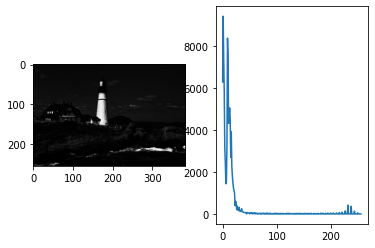

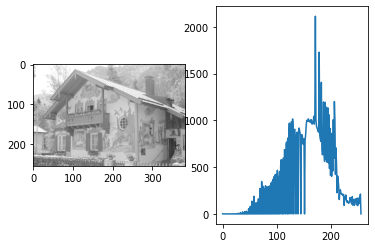

In [126]:
# TODO: load images
ueb131_path = "/content/cs4250/data/exercise_1/ueb131.png"
img_131 = cv2.imread(ueb131_path, cv2.IMREAD_COLOR)
img_131 = cv2.cvtColor(img_131, cv2.COLOR_BGR2GRAY)
ueb132_path = "/content/cs4250/data/exercise_1/ueb132.png"
img_132 = cv2.imread(ueb132_path, cv2.IMREAD_COLOR)
img_132 = cv2.cvtColor(img_132, cv2.COLOR_BGR2GRAY)

# TODO: display images with histograms
display_with_hist(img_131)
display_with_hist(img_132)

# first image underexposed
# second overexposed 


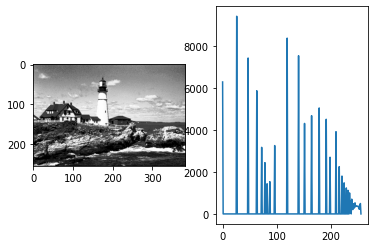

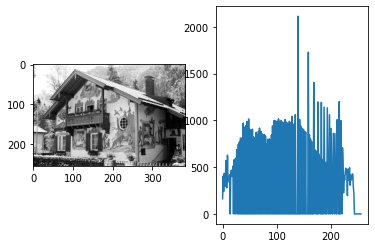

In [127]:
# TODO: convert images to uint8
img_131_uint8 = normalized_to_uint8(img_131)
img_132_uint8 = normalized_to_uint8(img_132)

# TODO: equalize histogram and display
dst = cv2.equalizeHist(img_131_uint8)
dst2 = cv2.equalizeHist(img_132_uint8)
display_with_hist(dst)
display_with_hist(dst2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


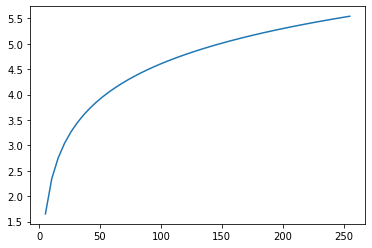

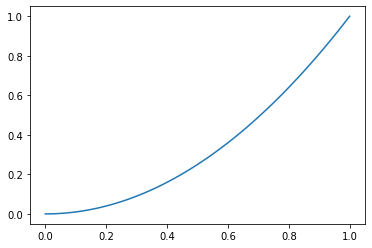

In [128]:
# TODO: display logarithmic function
plt.figure()
plt.plot(np.linspace(0,255), np.log(np.linspace(0,255)))
# TODO: display quadratic function
plt.figure()
plt.plot(np.linspace(0,1, num=100), 
         np.linspace(0,1, num=100)*np.linspace(0,1, num=100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<Figure size 432x288 with 0 Axes>

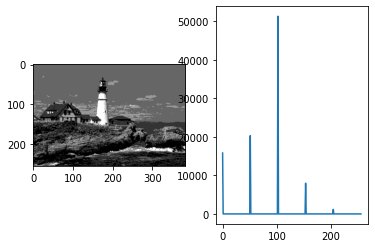

In [130]:
# TODO: transform and display ueb131.png
image1_log = np.uint8(np.log(img_131_uint8+1))
plt.figure()
display_with_hist(image1_log)

<Figure size 432x288 with 0 Axes>

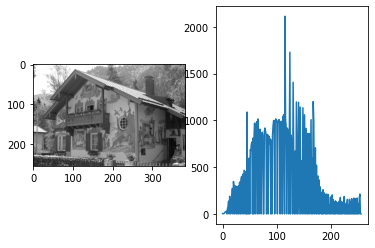

In [131]:
# TODO: transform and display ueb132.png
im_scaled2 = cv2.normalize(img_132, None, alpha=0, beta=1, 
                           norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
image2_quat=np.multiply(im_scaled2,im_scaled2);
plt.figure()
display_with_hist(image2_quat)